In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Classification Datasets/Rain in Australia/weatherAUS.csv")

In [3]:
# Function which returns column names whose values are missing at current point of time
def missing_values():
    temp_dict = dict()
    for i in data.columns:
        if data[i].isnull().sum()>0:
            temp_dict[i]=data[i].isnull().sum()
    return temp_dict        

In [4]:
missing_values()

{'MinTemp': 637,
 'MaxTemp': 322,
 'Rainfall': 1406,
 'Evaporation': 60843,
 'Sunshine': 67816,
 'WindGustDir': 9330,
 'WindGustSpeed': 9270,
 'WindDir9am': 10013,
 'WindDir3pm': 3778,
 'WindSpeed9am': 1348,
 'WindSpeed3pm': 2630,
 'Humidity9am': 1774,
 'Humidity3pm': 3610,
 'Pressure9am': 14014,
 'Pressure3pm': 13981,
 'Cloud9am': 53657,
 'Cloud3pm': 57094,
 'Temp9am': 904,
 'Temp3pm': 2726,
 'RainToday': 1406}

In [5]:
data.shape

(142193, 24)

In [6]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
data[missing_values()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
dtypes: float64(16), object(4)
memory usage: 21.7+ MB


In [8]:
dtypes_def = data.dtypes.reset_index()
dtypes_def.columns = ['Count','Column Type']
dtypes_def.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,float64,17
1,object,7


In [9]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [10]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [11]:
data.groupby('month').MinTemp.mean()

month
1     17.520778
2     17.500239
3     15.904347
4     12.831979
5      9.618572
6      7.815031
7      6.951308
8      7.465145
9      9.460189
10    11.531145
11    14.299624
12    15.771514
Name: MinTemp, dtype: float64

In [13]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12


In [16]:
datasetHasNan = True

In [17]:
if datasetHasNan == True:
    nas = pd.concat([data.isnull().sum()], axis=1, keys=['Train Dataset']) 
    print('Nan in the dataset')
    print(nas[nas.sum(axis=1) > 0])

Nan in the dataset
               Train Dataset
MinTemp                  637
MaxTemp                  322
Rainfall                1406
Evaporation            60843
Sunshine               67816
WindGustDir             9330
WindGustSpeed           9270
WindDir9am             10013
WindDir3pm              3778
WindSpeed9am            1348
WindSpeed3pm            2630
Humidity9am             1774
Humidity3pm             3610
Pressure9am            14014
Pressure3pm            13981
Cloud9am               53657
Cloud3pm               57094
Temp9am                  904
Temp3pm                 2726
RainToday               1406


In [20]:
def delete_columns(col):
    if data[col].isnull().sum() > (data[col].count())*0.4:
        del data[col]

for col in data.columns:
    delete_columns(col)

In [21]:
missing_values()

{'MinTemp': 637,
 'MaxTemp': 322,
 'Rainfall': 1406,
 'WindGustDir': 9330,
 'WindGustSpeed': 9270,
 'WindDir9am': 10013,
 'WindDir3pm': 3778,
 'WindSpeed9am': 1348,
 'WindSpeed3pm': 2630,
 'Humidity9am': 1774,
 'Humidity3pm': 3610,
 'Pressure9am': 14014,
 'Pressure3pm': 13981,
 'Temp9am': 904,
 'Temp3pm': 2726,
 'RainToday': 1406}

In [165]:
Hist_Normal_Features = ['MinTemp','MaxTemp','Humidity3pm','WindSpeed3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
Hist_Log_Features = ['WindGustSpeed','WindSpeed9am','Humidity9am']
Classification_Features = ['WindGustDir','WindDir9am','WindDir3pm']

In [89]:
(len(Hist_Normal_Features)-1)

7

C:\Users\Kaushik\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kaushik\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


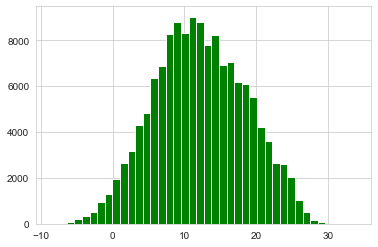

In [41]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

Text(0.5, 1.0, 'MinTemp')

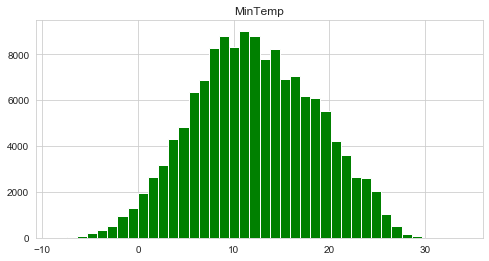

In [62]:
#distribution plot of the ticket fare
data[Hist_Normal_Features[0]].hist(color='green',bins=40,figsize=(8,4))
plt.title(Hist_Normal_Features[0])

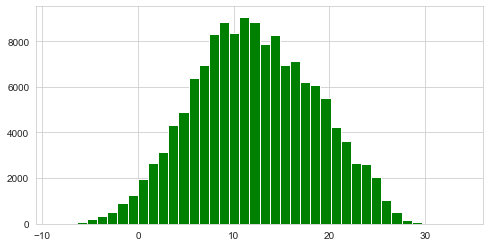

In [107]:
#distribution plot of the ticket fare
data['MinTemp'].hist(color='green',bins=40,figsize=(8,4))

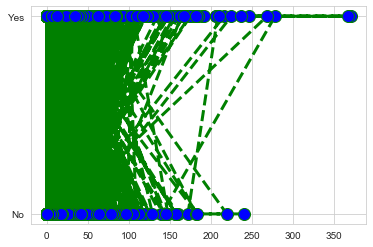

In [30]:
plt.plot(data['Rainfall'],data['RainTomorrow'], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()

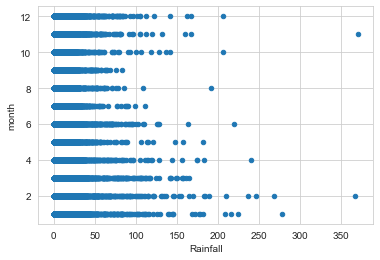

In [36]:
data.plot.scatter(x='Rainfall',y='month')

In [37]:
data['MinTemp'].mean()

12.186399728729098

ValueError: cannot convert float NaN to integer

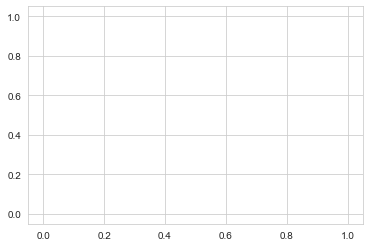

Text(0.5, 1.0, 'Pressure9am')

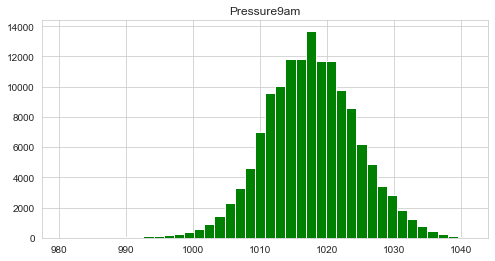

In [131]:
#distribution plot of the Hist Normal Features
data[Hist_Normal_Features[4]].hist(color='green',bins=40,figsize=(8,4))
plt.title(Hist_Normal_Features[4])

In [103]:
random_MinTemp = np.random.randint(data["MinTemp"].mean() - data["MinTemp"].std(),
                                          data["MinTemp"].mean() + data["MinTemp"].std(),
                                          size = data["MinTemp"].isnull().sum())
data["MinTemp"][np.isnan(data["MinTemp"])] = random_MinTemp

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [104]:
missing_values()

{'MaxTemp': 322,
 'Rainfall': 1406,
 'WindGustDir': 9330,
 'WindGustSpeed': 9270,
 'WindDir9am': 10013,
 'WindDir3pm': 3778,
 'WindSpeed9am': 1348,
 'WindSpeed3pm': 2630,
 'Humidity9am': 1774,
 'Humidity3pm': 3610,
 'Pressure9am': 14014,
 'Pressure3pm': 13981,
 'Temp9am': 904,
 'Temp3pm': 2726,
 'RainToday': 1406}

In [105]:
random_MaxTemp = np.random.randint(data["MaxTemp"].mean() - data["MaxTemp"].std(),
                                          data["MaxTemp"].mean() + data["MaxTemp"].std(),
                                          size = data["MaxTemp"].isnull().sum())
data["MaxTemp"][np.isnan(data["MaxTemp"])] = random_MaxTemp

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


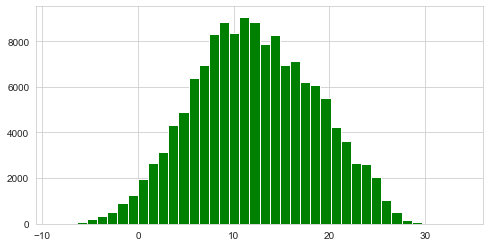

In [108]:
data['MinTemp'].hist(color='green',bins=40,figsize=(8,4))

In [109]:
random_Humidity3pm = np.random.randint(data["Humidity3pm"].mean() - data["Humidity3pm"].std(),
                                          data["Humidity3pm"].mean() + data["Humidity3pm"].std(),
                                          size = data["Humidity3pm"].isnull().sum())
data["Humidity3pm"][np.isnan(data["Humidity3pm"])] = random_Humidity3pm

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [110]:
random_WindSpeed3pm = np.random.randint(data["WindSpeed3pm"].mean() - data["WindSpeed3pm"].std(),
                                          data["WindSpeed3pm"].mean() + data["WindSpeed3pm"].std(),
                                          size = data["WindSpeed3pm"].isnull().sum())
data["WindSpeed3pm"][np.isnan(data["WindSpeed3pm"])] = random_WindSpeed3pm

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [111]:
random_Pressure9am = np.random.randint(data["Pressure9am"].mean() - data["Pressure9am"].std(),
                                          data["Pressure9am"].mean() + data["Pressure9am"].std(),
                                          size = data["Pressure9am"].isnull().sum())
data["Pressure9am"][np.isnan(data["Pressure9am"])] = random_Pressure9am

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [112]:
random_Pressure3pm = np.random.randint(data["Pressure3pm"].mean() - data["Pressure3pm"].std(),
                                          data["Pressure3pm"].mean() + data["Pressure3pm"].std(),
                                          size = data["Pressure3pm"].isnull().sum())
data["Pressure3pm"][np.isnan(data["Pressure3pm"])] = random_Pressure3pm

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [113]:
random_Temp9am = np.random.randint(data["Temp9am"].mean() - data["Temp9am"].std(),
                                          data["Temp9am"].mean() + data["Temp9am"].std(),
                                          size = data["Temp9am"].isnull().sum())
data["Temp9am"][np.isnan(data["Temp9am"])] = random_Temp9am

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [114]:
random_Temp3pm = np.random.randint(data["Temp3pm"].mean() - data["Temp3pm"].std(),
                                          data["Temp3pm"].mean() + data["Temp3pm"].std(),
                                          size = data["Temp3pm"].isnull().sum())
data["Temp3pm"][np.isnan(data["Temp3pm"])] = random_Temp3pm

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [133]:
data["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [130]:
missing_values()

{'Rainfall': 1406,
 'WindGustDir': 9330,
 'WindGustSpeed': 9270,
 'WindDir9am': 10013,
 'WindDir3pm': 3778,
 'WindSpeed9am': 1348,
 'Humidity9am': 1774,
 'RainToday': 1406}

In [137]:
data['FamilySizeGroup'] = 'Small'


In [146]:
data["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [147]:
data.loc[data['WindGustDir'] == 'W', 'Total_GustDir'] = 1
data.loc[data['WindGustDir'] == 'WNW', 'Total_GustDir'] = 2
data.loc[data['WindGustDir'] == 'WSW', 'Total_GustDir'] = 3
data.loc[data['WindGustDir'] == 'NE', 'Total_GustDir'] = 4
data.loc[data['WindGustDir'] == 'NNW', 'Total_GustDir'] = 5
data.loc[data['WindGustDir'] == 'N', 'Total_GustDir'] = 6
data.loc[data['WindGustDir'] == 'NNE', 'Total_GustDir'] = 7
data.loc[data['WindGustDir'] == 'SW', 'Total_GustDir'] = 8
data.loc[data['WindGustDir'] == 'ENE', 'Total_GustDir'] = 9
data.loc[data['WindGustDir'] == 'SSE', 'Total_GustDir'] = 10
data.loc[data['WindGustDir'] == 'S', 'Total_GustDir'] = 11
data.loc[data['WindGustDir'] == 'NW', 'Total_GustDir'] = 12
data.loc[data['WindGustDir'] == 'SE', 'Total_GustDir'] = 13
data.loc[data['WindGustDir'] == 'ESE', 'Total_GustDir'] = 14
data.loc[data['WindGustDir'] == 'E', 'Total_GustDir'] = 15
data.loc[data['WindGustDir'] == 'SSW', 'Total_GustDir'] = 16

In [154]:
random_Total_GustDir = np.random.randint(data["Total_GustDir"].mean() - data["Total_GustDir"].std(),
                                          data["Total_GustDir"].mean() + data["Total_GustDir"].std(),
                                          size = data["Total_GustDir"].isnull().sum())
data["Total_GustDir"][np.isnan(data["Total_GustDir"])] = random_Total_GustDir

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [174]:
data['Total_GustDir'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [160]:
data.loc[data['WindDir9am'] == 'W', 'Wind_at9am'] = 1
data.loc[data['WindDir9am'] == 'WNW', 'Wind_at9am'] = 2
data.loc[data['WindDir9am'] == 'WSW', 'Wind_at9am'] = 3
data.loc[data['WindDir9am'] == 'NE', 'Wind_at9am'] = 4
data.loc[data['WindDir9am'] == 'NNW', 'Wind_at9am'] = 5
data.loc[data['WindDir9am'] == 'N', 'Wind_at9am'] = 6
data.loc[data['WindDir9am'] == 'NNE', 'Wind_at9am'] = 7
data.loc[data['WindDir9am'] == 'SW', 'Wind_at9am'] = 8
data.loc[data['WindDir9am'] == 'ENE', 'Wind_at9am'] = 9
data.loc[data['WindDir9am'] == 'SSE', 'Wind_at9am'] = 10
data.loc[data['WindDir9am'] == 'S', 'Wind_at9am'] = 11
data.loc[data['WindDir9am'] == 'NW', 'Wind_at9am'] = 12
data.loc[data['WindDir9am'] == 'SE', 'Wind_at9am'] = 13
data.loc[data['WindDir9am'] == 'ESE', 'Wind_at9am'] = 14
data.loc[data['WindDir9am'] == 'E', 'Wind_at9am'] = 15
data.loc[data['WindDir9am'] == 'SSW', 'Wind_at9am'] = 16

random_Wind_at9am = np.random.randint(data["Wind_at9am"].mean() - data["Wind_at9am"].std(),
                                          data["Wind_at9am"].mean() + data["Wind_at9am"].std(),
                                          size = data["Wind_at9am"].isnull().sum())
data["Wind_at9am"][np.isnan(data["Wind_at9am"])] = random_Wind_at9am

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [161]:
data.loc[data['WindDir3pm'] == 'W', 'Wind_at3pm'] = 1
data.loc[data['WindDir3pm'] == 'WNW', 'Wind_at3pm'] = 2
data.loc[data['WindDir3pm'] == 'WSW', 'Wind_at3pm'] = 3
data.loc[data['WindDir3pm'] == 'NE', 'Wind_at3pm'] = 4
data.loc[data['WindDir3pm'] == 'NNW', 'Wind_at3pm'] = 5
data.loc[data['WindDir3pm'] == 'N', 'Wind_at3pm'] = 6
data.loc[data['WindDir3pm'] == 'NNE', 'Wind_at3pm'] = 7
data.loc[data['WindDir3pm'] == 'SW', 'Wind_at3pm'] = 8
data.loc[data['WindDir3pm'] == 'ENE', 'Wind_at3pm'] = 9
data.loc[data['WindDir3pm'] == 'SSE', 'Wind_at3pm'] = 10
data.loc[data['WindDir3pm'] == 'S', 'Wind_at3pm'] = 11
data.loc[data['WindDir3pm'] == 'NW', 'Wind_at3pm'] = 12
data.loc[data['WindDir3pm'] == 'SE', 'Wind_at3pm'] = 13
data.loc[data['WindDir3pm'] == 'ESE', 'Wind_at3pm'] = 14
data.loc[data['WindDir3pm'] == 'E', 'Wind_at3pm'] = 15
data.loc[data['WindDir3pm'] == 'SSW', 'Wind_at3pm'] = 16

random_Wind_at3pm = np.random.randint(data["Wind_at3pm"].mean() - data["Wind_at3pm"].std(),
                                          data["Wind_at3pm"].mean() + data["Wind_at3pm"].std(),
                                          size = data["Wind_at3pm"].isnull().sum())
data["Wind_at3pm"][np.isnan(data["Wind_at3pm"])] = random_Wind_at3pm

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [166]:
Hist_Log_Features = ['WindGustSpeed','WindSpeed9am','Humidity9am']
Classification_Features = ['WindGustDir','WindDir9am','WindDir3pm']

In [168]:
Hist_Log_Features

['WindGustSpeed', 'WindSpeed9am', 'Humidity9am']

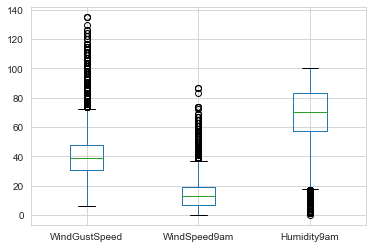

In [183]:
data.boxplot(column=Hist_Log_Features)

In [182]:
data[data['WindSpeed9am'] >100]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,FamilySizeGroup,Total_GustDir,Wind_at9am,Wind_at3pm


In [181]:
data.drop(data.loc[data['WindSpeed9am'] > 100].index, inplace=True)

Text(0.5, 1.0, 'WindSpeed9am')

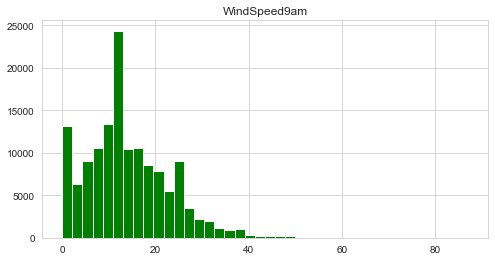

In [188]:
data[Hist_Log_Features[1]].hist(color='green',bins=40,figsize=(8,4))
plt.title(Hist_Log_Features[1])

In [190]:
data.drop(data.loc[data['WindSpeed9am'].isnull()].index, inplace=True)

In [191]:
missing_values()

{'Rainfall': 1113,
 'WindGustDir': 8310,
 'WindGustSpeed': 8269,
 'WindDir9am': 8665,
 'WindDir3pm': 2878,
 'Humidity9am': 1242,
 'RainToday': 1113,
 'FamilySizeGroup': 123058}

In [192]:
data.drop(data.loc[data['Humidity9am'].isnull()].index, inplace=True)

In [193]:
data.drop(data.loc[data['WindGustSpeed'].isnull()].index, inplace=True)

In [196]:
missing_values()

{'Rainfall': 994,
 'WindGustDir': 14,
 'WindDir9am': 7079,
 'WindDir3pm': 882,
 'RainToday': 994}

In [195]:
del data['FamilySizeGroup']

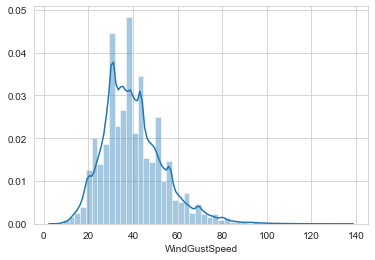

In [198]:
sns.distplot(data['WindGustSpeed'])

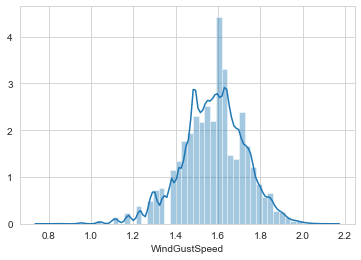

In [199]:
sns.distplot(np.log10(data['WindGustSpeed']))

In [205]:
data['log_totalGust'] = np.log10(data['WindGustSpeed'])
data['log_9amSpeed'] = np.log10(data['WindSpeed9am'])

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


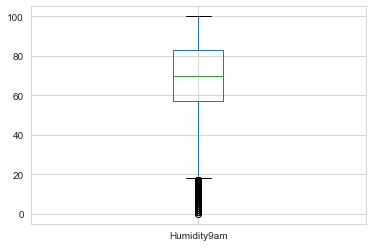

In [208]:
data.boxplot(column='Humidity9am')

In [210]:
missing_values()

{'Rainfall': 994,
 'WindGustDir': 14,
 'WindDir9am': 7079,
 'WindDir3pm': 882,
 'RainToday': 994}

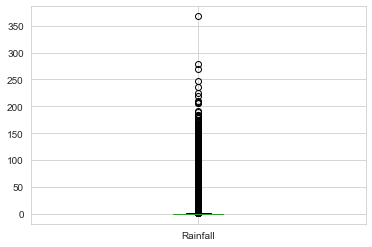

In [211]:
data.boxplot(column='Rainfall')

In [212]:
data.drop(data.loc[data['Rainfall'].isnull()].index, inplace=True)
data.drop(data.loc[data['Rainfall'] > 300].index, inplace=True)

In [225]:
data.drop(data.loc[data['RainToday'].isnull()].index, inplace=True)

In [226]:
del data['WindGustDir']
del data['WindDir9am']
del data['WindDir3pm']

In [228]:
missing_values()

{}

In [229]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainToday,RISK_MM,RainTomorrow,year,month,Total_GustDir,Wind_at9am,Wind_at3pm,log_totalGust,log_9amSpeed
0,12/1/2008,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,...,No,0.0,No,2008,12,1.0,1.0,2.0,1.643453,1.301030
1,12/2/2008,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,...,No,0.0,No,2008,12,2.0,5.0,3.0,1.643453,0.602060
2,12/3/2008,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,...,No,0.0,No,2008,12,3.0,1.0,3.0,1.662758,1.278754
3,12/4/2008,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,...,No,1.0,No,2008,12,4.0,13.0,15.0,1.380211,1.041393
4,12/5/2008,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,No,0.2,No,2008,12,1.0,9.0,12.0,1.612784,0.845098


In [239]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo',
       'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
       'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [240]:
data = data.drop(columns = ['Location'])

In [241]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,RainToday,RISK_MM,RainTomorrow,year,month,Total_GustDir,Wind_at9am,Wind_at3pm,log_totalGust,log_9amSpeed
0,12/1/2008,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0.0,0,2008,12,1.0,1.0,2.0,1.643453,1.301030
1,12/2/2008,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0.0,0,2008,12,2.0,5.0,3.0,1.643453,0.602060
2,12/3/2008,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0.0,0,2008,12,3.0,1.0,3.0,1.662758,1.278754
3,12/4/2008,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,1.0,0,2008,12,4.0,13.0,15.0,1.380211,1.041393
4,12/5/2008,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,0.2,0,2008,12,1.0,9.0,12.0,1.612784,0.845098


In [234]:
TrueFalse = {'Yes': 1,'No': 0, 0:-99999} 
data['RainToday'] = [TrueFalse[item] for item in data['RainToday']]
data['RainTomorrow'] = [TrueFalse[item] for item in data['RainTomorrow']]

In [238]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainToday,RISK_MM,RainTomorrow,year,month,Total_GustDir,Wind_at9am,Wind_at3pm,log_totalGust,log_9amSpeed
0,12/1/2008,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,...,0,0.0,0,2008,12,1.0,1.0,2.0,1.643453,1.301030
1,12/2/2008,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,...,0,0.0,0,2008,12,2.0,5.0,3.0,1.643453,0.602060
2,12/3/2008,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,...,0,0.0,0,2008,12,3.0,1.0,3.0,1.662758,1.278754
3,12/4/2008,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0,1.0,0,2008,12,4.0,13.0,15.0,1.380211,1.041393
4,12/5/2008,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,0,0.2,0,2008,12,1.0,9.0,12.0,1.612784,0.845098


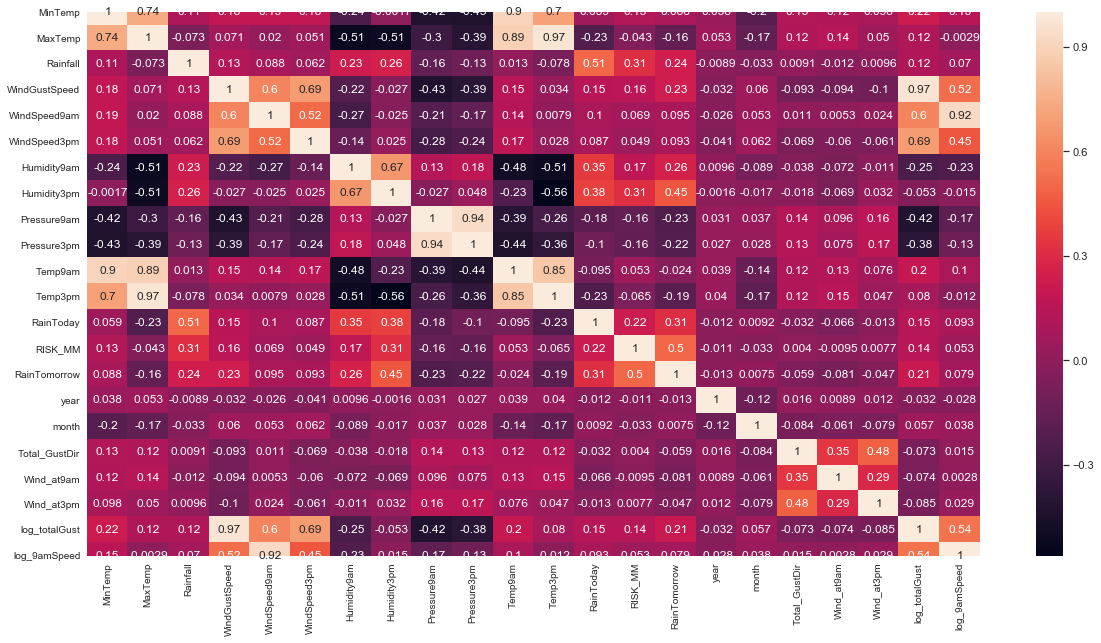

In [242]:
dimension = (20,10)
fig, ax = plt.subplots(figsize = dimension)
sns.set(style='white')
sns.heatmap(data.reset_index(drop=True).corr(), annot=True)

In [244]:
# Split data for training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('RainTomorrow',axis=1), 
           data['RainTomorrow'], test_size=0.30, 
            random_state=101)

In [247]:
from sklearn import linear_model

In [251]:
svc = SVC(C = 0.1, gamma=0.1)

In [252]:

svc.fit(X_train, y_train)

ValueError: could not convert string to float: '12/4/2013'